In [2]:
from simsopt.geo import CurveCWSFourier, SurfaceRZFourier, curves_to_vtk
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:

circular_tokamak = "/home/joaobiu/simsopt_curvecws/tests/test_files/wout_circular_tokamak_reference.nc"
w7x = "/home/joaobiu/pic/vmec_equilibria/LHD/090493t2330/wout_LHD_090493t2330.nc"
filename = "/home/joaobiu/pic/vmec_equilibria/NCSX/li383_1.4m/wout_li383_1.4m.nc"

In [6]:
def image_maker(filename, name1, name2):
    s = SurfaceRZFourier.from_wout(filename, range="full torus", ntheta=64, nphi=64)  # range = 'full torus', 'field period', 'half period'

    sdofs = s.get_dofs()

    cws = CurveCWSFourier(mpol=s.mpol, ntor=s.ntor, idofs=sdofs, quadpoints=250, order=1, nfp=s.nfp, stellsym=s.stellsym)

    phi_array = np.linspace(0, 2 * np.pi, 8)

    fig = plt.figure()
    #Create multiple cws curves and plot them with the surface
    ax = fig.add_subplot(projection="3d")

    for phi in phi_array:
        cws.set_dofs([1, 0, 0, 0, 0, phi, 0, 0])
        gamma = cws.gamma()
        x = gamma[:, 0]
        y = gamma[:, 1]
        z = gamma[:, 2]
        ax.plot(x, y, z)


    s.plot(ax=ax, show=False, alpha=0.2)
    #plt.title("Superimposed Coil Curves and CWS")
    plt.axis('off')
    
    ax.set_xlabel('X', weight='bold')
    ax.set_ylabel('Y', weight='bold')
    ax.set_zlabel('Z', weight='bold')
    plt.savefig(name1, dpi=400, bbox_inches = 'tight')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for phi in phi_array:
        cws.set_dofs([1, 0, 0, 0, 0, phi, 0, 0])
        gamma = cws.gamma()
        x = gamma[:, 0]
        y = gamma[:, 1]
        z = gamma[:, 2]

        r = np.sqrt(x * x + y * y)
        r_coil = r
        z_coil = z
        ax.plot(r, z)

        surface_gamma = s.cross_section(phi)
        x = surface_gamma[:, 0]
        y = surface_gamma[:, 1]
        z = surface_gamma[:, 2]
        r = np.sqrt(x * x + y * y)
        ax.plot(r, z, "--")
    ax.plot(r_coil, z_coil, label=f"Curve")
    ax.plot(r, z, "--", label=f"CWS")
    ax.legend()
    #ax.legend()
    ax.set_title(r"Coil Curve and CWS at different $\phi$ angles")
    ax.set_xlabel("r", weight='bold')
    ax.set_ylabel("z", weight='bold')

    plt.savefig(name2, dpi=400, bbox_inches = 'tight')
    plt.show()

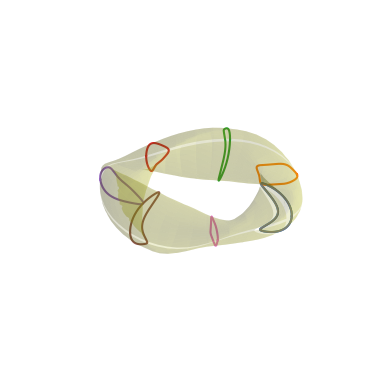

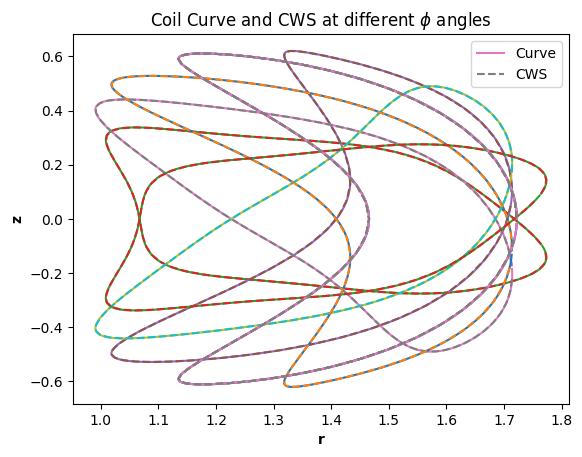

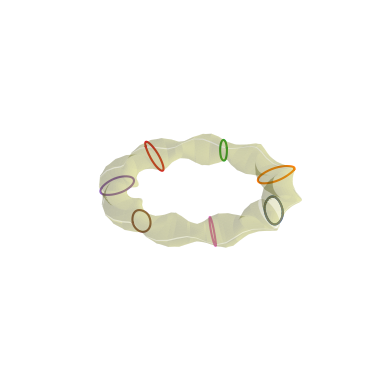

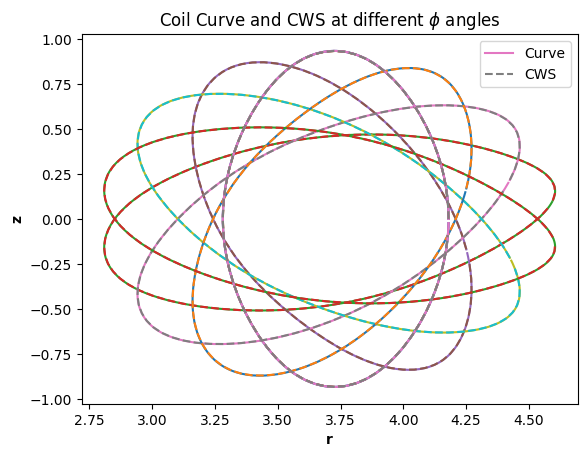

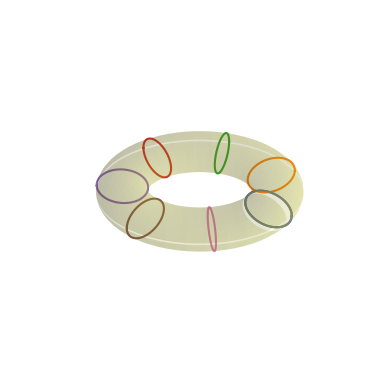

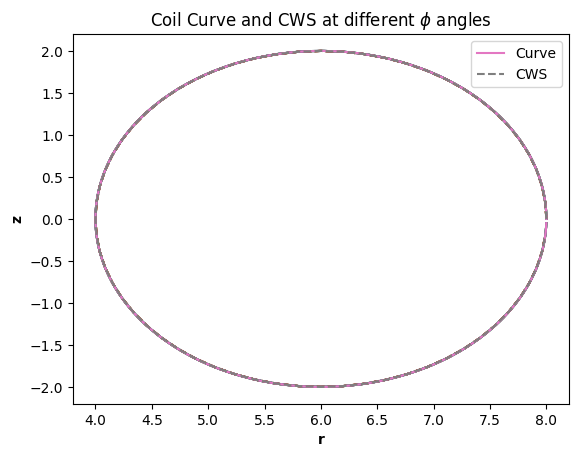

In [7]:
image_maker(filename, "plot2d_1.png", "plot3d_1.png")
image_maker(w7x, "w7x_2d.png", "w7x_3d.png")
image_maker(circular_tokamak, "tokamak_2d.png", "tokamak_3d.png")

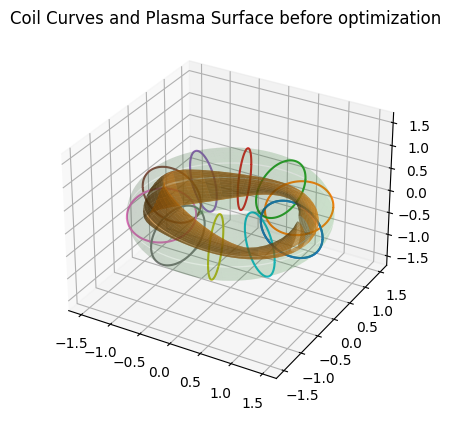

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")


filename_stell = "/home/joaobiu/simsopt_curvecws/tests/test_files/input.LandremanPaul2021_QA"

surf = SurfaceRZFourier.from_vmec_input(filename_stell)

R0 = surf.get_rc(0, 0)

cws = SurfaceRZFourier.from_nphi_ntheta(nphi=128, ntheta=128, range="full torus", nfp=1)
cws.set_dofs([R0, 0.5, 0.6])




cs = CurveCWSFourier(mpol=cws.mpol, ntor=cws.ntor, idofs=cws.x, quadpoints=250, order=1, nfp=cws.nfp, stellsym=cws.stellsym)

phi_array = np.linspace(0, 2 * np.pi, 11)

base_curves = []

for i in range(11):

    curve_cws = CurveCWSFourier(
        mpol=cws.mpol,
        ntor=cws.ntor,
        idofs=cws.x,
        quadpoints=100,
        order=1,
        nfp=cws.nfp,
        stellsym=cws.stellsym,
    )
    curve_cws.set_dofs([1, 0, 0, 0, 0, phi_array[i], 0, 0])
    gamma = curve_cws.gamma()
    x = gamma[:, 0]
    y = gamma[:, 1]
    z = gamma[:, 2]
    ax.plot(x, y, z)
    
surf.plot(ax=ax, show=False, alpha=0.6)

cws.plot(ax=ax, show=False, alpha=0.1)
plt.title("Coil Curves and Plasma Surface before optimization")
plt.axis('off')
plt.savefig("coils.png", dpi=400)

plt.show()